In [132]:
import numpy as np
import pandas as pd
import os
import json
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

from wordcloud import WordCloud, STOPWORDS,ImageColorGenerator

I wanted to check what is my current working directory so I can properly import my dataset

In [133]:
os.getcwd()

'C:\\Users\\Marco\\Documents\\CIND 820'

I've loaded the dataset from a json file to convert to a pandas dataframe I've chosen to reduce the rows to 200,000 since the dataset was relatiively large already coming in at 6.17gb 

Since I wanted to predict review scores I've selected the reviews dataset primarily to work with review text data. 

In [337]:
reviews = []
with open('yelp_academic_dataset_review.json',encoding='utf-8') as fl:
    for i, line in enumerate(fl):
        reviews.append(json.loads(line))
        if i+1 >= 5000:
            break
df_rev = pd.DataFrame(reviews)
df_rev.head()

,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,xQY8N_XvtGbearJ5X4QryQ,OwjRMXRC0KyPrIlcjaXeFQ,-MhfebM0QIsKt87iDN-FNw,2.0,5,0,0,"As someone who has worked with many museums, I...",2015-04-15 05:21:16
1,UmFMZ8PyXZTY2QcwzsfQYA,nIJD_7ZXHq-FX8byPMOkMQ,lbrU8StCq3yDfr-QMnGrmQ,1.0,1,1,0,I am actually horrified this place is still in...,2013-12-07 03:16:52
2,LG2ZaYiOgpr2DK_90pYjNw,V34qejxNsCbcgD8C0HVk-Q,HQl28KMwrEKHqhFrrDqVNQ,5.0,1,0,0,I love Deagan's. I do. I really do. The atmosp...,2015-12-05 03:18:11
3,i6g_oA9Yf9Y31qt0wibXpw,ofKDkJKXSKZXu5xJNGiiBQ,5JxlZaqCnk1MnbgRirs40Q,1.0,0,0,0,"Dismal, lukewarm, defrosted-tasting ""TexMex"" g...",2011-05-27 05:30:52
4,6TdNDKywdbjoTkizeMce8A,UgMW8bLE0QMJDCkQ1Ax5Mg,IS4cv902ykd8wj1TR0N3-A,4.0,0,0,0,"Oh happy day, finally have a Canes near my cas...",2017-01-14 21:56:57


In [338]:
review=df_rev[['stars','text']]

review.head()


,stars,text
0,2.0,"As someone who has worked with many museums, I..."
1,1.0,I am actually horrified this place is still in...
2,5.0,I love Deagan's. I do. I really do. The atmosp...
3,1.0,"Dismal, lukewarm, defrosted-tasting ""TexMex"" g..."
4,4.0,"Oh happy day, finally have a Canes near my cas..."


In [339]:
review.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   stars   5000 non-null   float64
 1   text    5000 non-null   object 
dtypes: float64(1), object(1)
memory usage: 78.2+ KB


In [340]:
print(review.describe())

             stars
count  5000.000000
mean      3.744000
std       1.438638
min       1.000000
25%       3.000000
50%       4.000000
75%       5.000000
max       5.000000


In [341]:
review.dtypes

stars    float64
text      object
dtype: object

Text(0.5, 0, 'Star Ratings ')

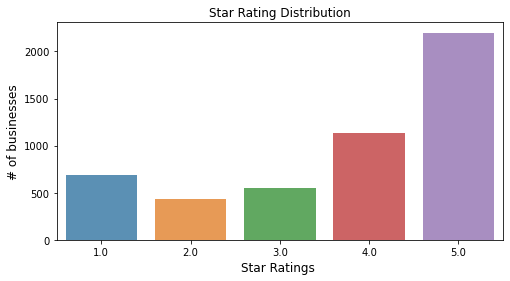

In [342]:
x=review['stars'].value_counts()
x=x.sort_index()
#plot
plt.figure(figsize=(8,4))
ax= sns.barplot(x.index, x.values, alpha=0.8)
plt.title("Star Rating Distribution")
plt.ylabel('# of businesses', fontsize=12)
plt.xlabel('Star Ratings ', fontsize=12)

I wanted to visualize the Seperate reviews so I decided to use wordcloud and per star review

In [343]:
stopwords = set(STOPWORDS)
def wordcloudFunc(data,title = None):
    wordclouds = WordCloud(
        background_color='white',
        stopwords=stopwords,
        #max_words=400,
        max_font_size=40,
        scale=3,
        random_state=0
    ).generate(str(data))
    
    fig = plt.figure(1,figsize=(20,20))
    plt.axis('off')
    if title:
        fig.subtitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)
        
    plt.imshow(wordclouds)
    plt.show()

In [344]:
onestarfilt=review['stars']==1.0
onestar=review[onestarfilt]
onestar.head()

,stars,text
1,1.0,I am actually horrified this place is still in...
3,1.0,"Dismal, lukewarm, defrosted-tasting ""TexMex"" g..."
15,1.0,"If I could give less than one star, that would..."
16,1.0,10pm on a super bowl Sunday and they're alread...
18,1.0,Tried to have my car repaired. Even made an a...


This is the onestar wordcloud function

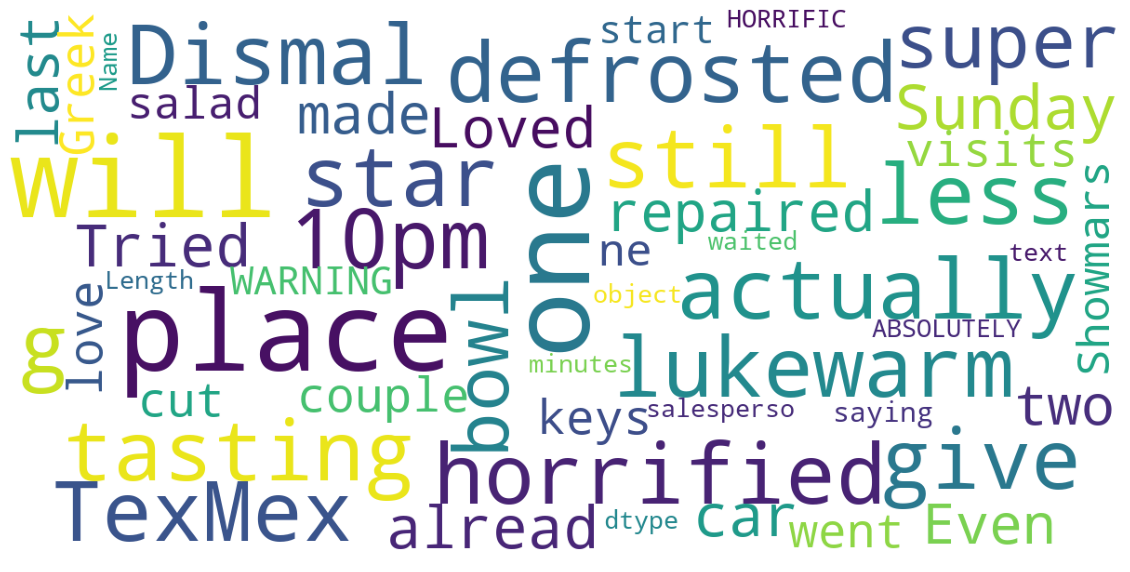

In [44]:
wordcloudFunc(onestar['text'].dropna())

In [345]:
twostarfilt=review['stars']==2.0
twostar=review[twostarfilt]
twostar.head()

,stars,text
0,2.0,"As someone who has worked with many museums, I..."
32,2.0,This actually used to be one of my favorite ho...
63,2.0,Decent food. Fishermen lobster or even congee ...
78,2.0,"Pros: Fun atmosphere, great for people watchin..."
86,2.0,"I love bookstores, and I love to spend some ti..."


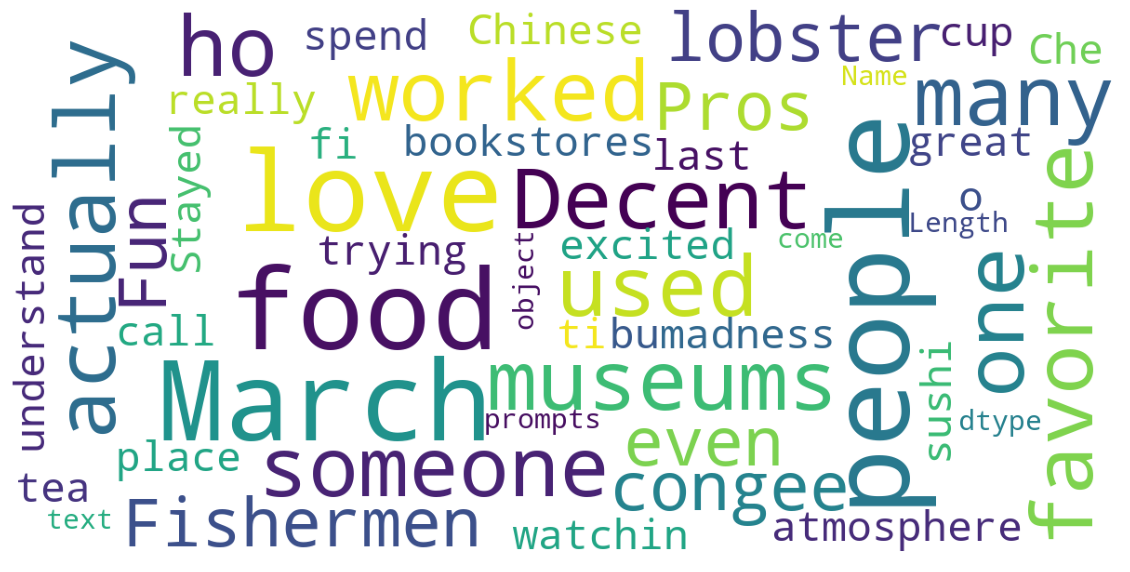

In [46]:
wordcloudFunc(twostar['text'].dropna())

In [346]:
threestarfilt=review['stars']==3.0
threestar=review[threestarfilt]
threestar.head()

,stars,text
19,3.0,My husband and I go there once a week since la...
34,3.0,The service is attentive. The decor attractive...
41,3.0,I stayed here back in April. Friday-Sunday. It...
42,3.0,Had brunch here Sunday with a friend. The meal...
44,3.0,Was super excited to bring my boyfriend to thi...


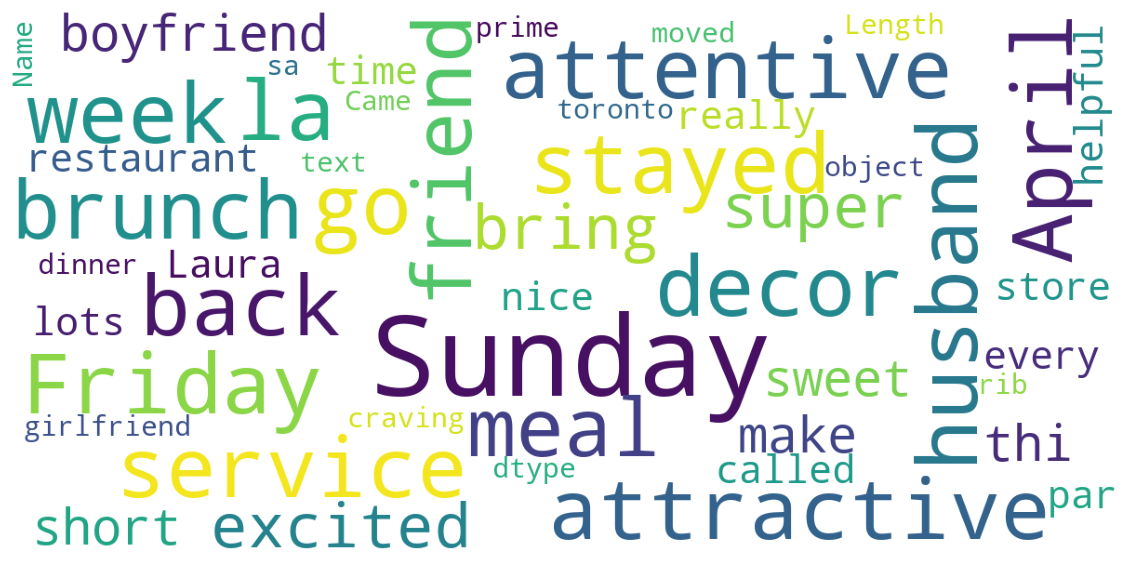

In [347]:
wordcloudFunc(threestar['text'].dropna())

In [49]:
fourstarfilt=review['stars']==4.0
fourstar=review[fourstarfilt]
fourstar.head()

,stars,text
4,4.0,"Oh happy day, finally have a Canes near my cas..."
9,4.0,I have been here twice. Very nice and laid bac...
11,4.0,ORDER In (Delivery) Review\n\nI discovered thi...
17,4.0,A close friend was in town and so instead of t...
22,4.0,"Coconut's Fish Cafe is a fantastic, Five Stars..."


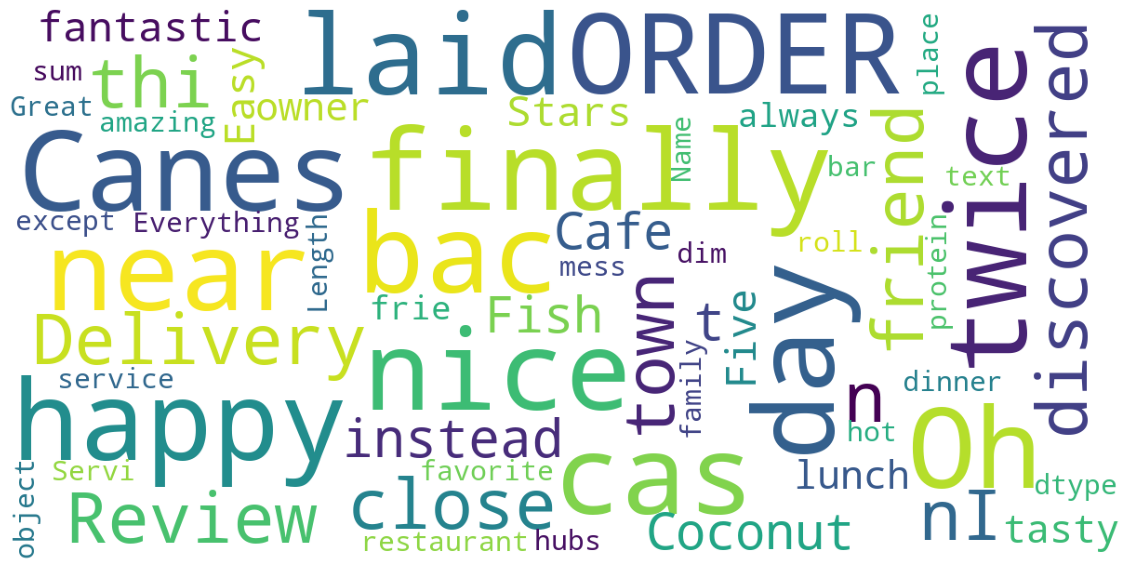

In [50]:
wordcloudFunc(fourstar['text'].dropna())

In [51]:
fivestarfilt=review['stars']==5.0
fivestar=review[fivestarfilt]
fivestar.head()

,stars,text
2,5.0,I love Deagan's. I do. I really do. The atmosp...
5,5.0,This is definitely my favorite fast food sub s...
6,5.0,"Really good place with simple decor, amazing f..."
7,5.0,"Awesome office and staff, very professional an..."
8,5.0,Most delicious authentic Italian I've had in t...


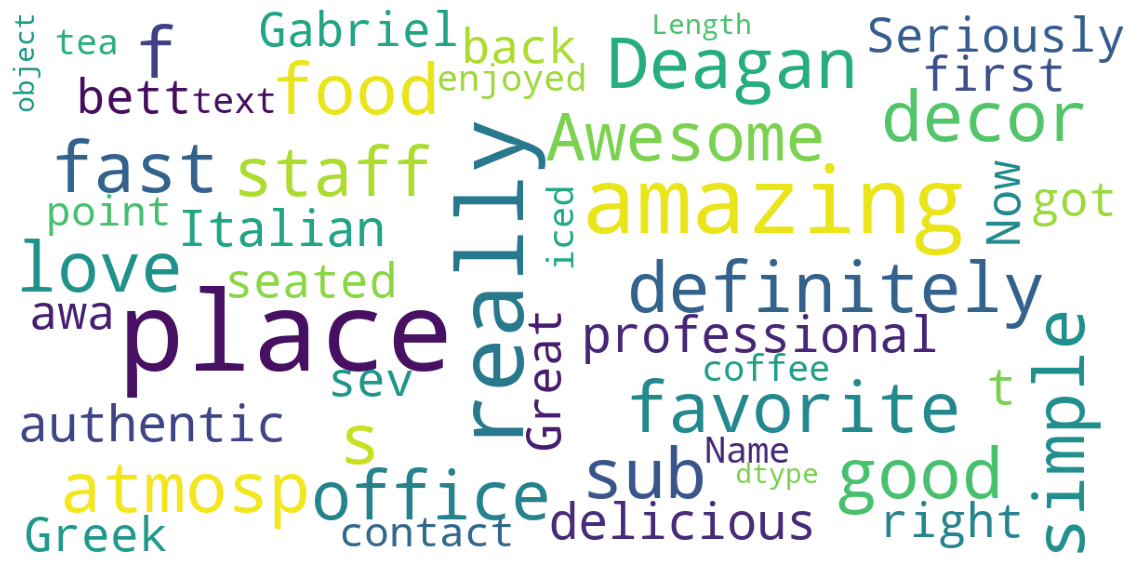

In [52]:
wordcloudFunc(fivestar['text'].dropna())

looking at all of the distribution below I can see that they are all relatively distributed the same way with the exception to firve star reviews having a few more shorter reviews than the rest

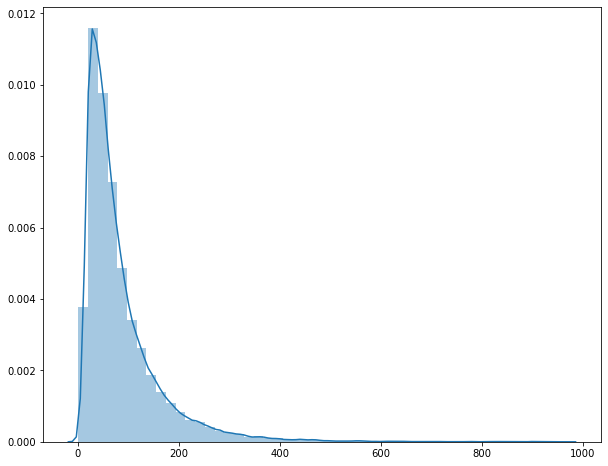

In [53]:
plt.figure(figsize=(10,8))
sns.distplot([len(txt.split()) for txt in fivestar['text'].values])
plt.show()

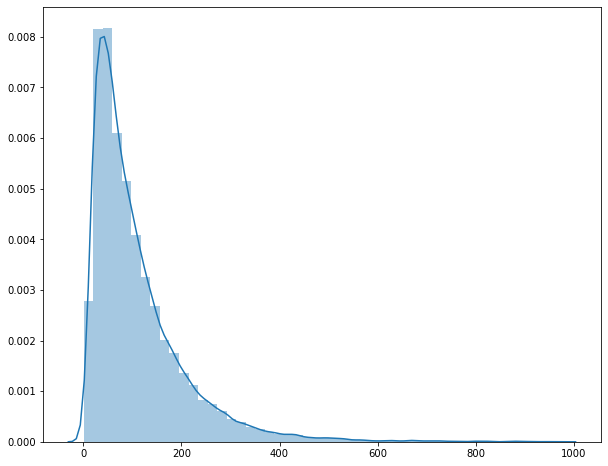

In [54]:
plt.figure(figsize=(10,8))
sns.distplot([len(txt.split()) for txt in fourstar['text'].values])
plt.show()

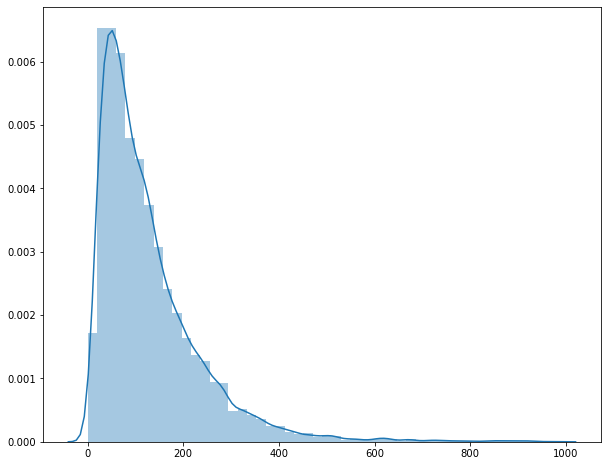

In [55]:
plt.figure(figsize=(10,8))
sns.distplot([len(txt.split()) for txt in threestar['text'].values])
plt.show()

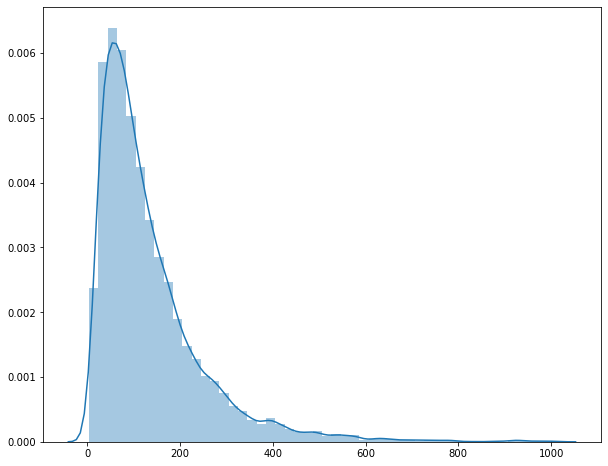

In [56]:
plt.figure(figsize=(10,8))
sns.distplot([len(txt.split()) for txt in twostar['text'].values])
plt.show()

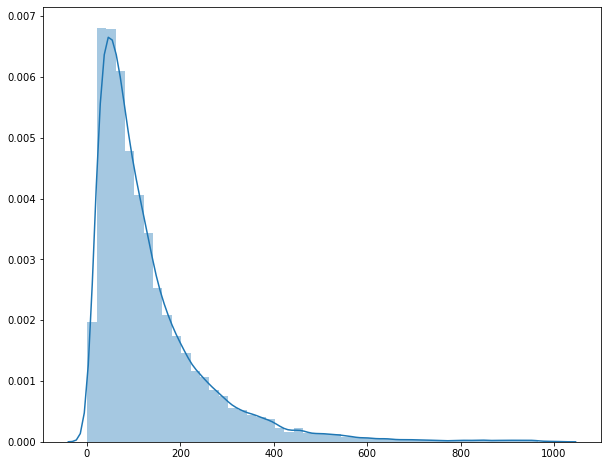

In [57]:
plt.figure(figsize=(10,8))
sns.distplot([len(txt.split()) for txt in onestar['text'].values])
plt.show()

In [348]:
review.head()

,stars,text
0,2.0,"As someone who has worked with many museums, I..."
1,1.0,I am actually horrified this place is still in...
2,5.0,I love Deagan's. I do. I really do. The atmosp...
3,1.0,"Dismal, lukewarm, defrosted-tasting ""TexMex"" g..."
4,4.0,"Oh happy day, finally have a Canes near my cas..."


In [349]:
"""
I first decided to classify the review star rating by differetiating between positive and negative reviews
"""
review['P/N_tag'] = np.where(review['stars'] > 3.0,1,0) 

C:\Users\Marco\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [350]:
"""
changed the text data to lowercase
"""
review['lowercase'] = review['text'].apply(lambda x: " ".join(word.lower() for word in x.split()))

C:\Users\Marco\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [351]:
review.head()

,stars,text,P/N_tag,lowercase
0,2.0,"As someone who has worked with many museums, I...",0,"as someone who has worked with many museums, i..."
1,1.0,I am actually horrified this place is still in...,0,i am actually horrified this place is still in...
2,5.0,I love Deagan's. I do. I really do. The atmosp...,1,i love deagan's. i do. i really do. the atmosp...
3,1.0,"Dismal, lukewarm, defrosted-tasting ""TexMex"" g...",0,"dismal, lukewarm, defrosted-tasting ""texmex"" g..."
4,4.0,"Oh happy day, finally have a Canes near my cas...",1,"oh happy day, finally have a canes near my cas..."


In [352]:

"""added a word count to possibly later use for further iterations to tune the classification algorithms""" 

review['WordCount'] = review['text'].apply(lambda x: len(x.split()))

C:\Users\Marco\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [353]:
"""
this will remove punctuation so that we can further increase accuracy
"""
review['punctuation'] = review['lowercase'].str.replace('[^\w\s]', '')

C:\Users\Marco\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [354]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Marco\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [355]:
import nltk
from nltk.corpus import stopwords 

In [356]:
stop_word = stopwords.words("english")
print(stop_word)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [357]:
review.head()

,stars,text,P/N_tag,lowercase,WordCount,punctuation
0,2.0,"As someone who has worked with many museums, I...",0,"as someone who has worked with many museums, i...",253,as someone who has worked with many museums i ...
1,1.0,I am actually horrified this place is still in...,0,i am actually horrified this place is still in...,276,i am actually horrified this place is still in...
2,5.0,I love Deagan's. I do. I really do. The atmosp...,1,i love deagan's. i do. i really do. the atmosp...,83,i love deagans i do i really do the atmosphere...
3,1.0,"Dismal, lukewarm, defrosted-tasting ""TexMex"" g...",0,"dismal, lukewarm, defrosted-tasting ""texmex"" g...",61,dismal lukewarm defrostedtasting texmex glop m...
4,4.0,"Oh happy day, finally have a Canes near my cas...",1,"oh happy day, finally have a canes near my cas...",171,oh happy day finally have a canes near my casa...


In [358]:
"""
lastly in the first attempt I removed stop words from the text data
"""
review['CleanText'] = review['punctuation'].apply(lambda x: " ".join(word for word in x.split() if word not in stop_word))

C:\Users\Marco\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [359]:
review.head()

,stars,text,P/N_tag,lowercase,WordCount,punctuation,CleanText
0,2.0,"As someone who has worked with many museums, I...",0,"as someone who has worked with many museums, i...",253,as someone who has worked with many museums i ...,someone worked many museums eager visit galler...
1,1.0,I am actually horrified this place is still in...,0,i am actually horrified this place is still in...,276,i am actually horrified this place is still in...,actually horrified place still business 3 year...
2,5.0,I love Deagan's. I do. I really do. The atmosp...,1,i love deagan's. i do. i really do. the atmosp...,83,i love deagans i do i really do the atmosphere...,love deagans really atmosphere cozy festive sh...
3,1.0,"Dismal, lukewarm, defrosted-tasting ""TexMex"" g...",0,"dismal, lukewarm, defrosted-tasting ""texmex"" g...",61,dismal lukewarm defrostedtasting texmex glop m...,dismal lukewarm defrostedtasting texmex glop m...
4,4.0,"Oh happy day, finally have a Canes near my cas...",1,"oh happy day, finally have a canes near my cas...",171,oh happy day finally have a canes near my casa...,oh happy day finally canes near casa yes other...


In [363]:
review = review.drop(columns=['text','lowercase','punctuation','WordCount'])
review.head()

,stars,P/N_tag,CleanText
0,2.0,0,someone worked many museums eager visit galler...
1,1.0,0,actually horrified place still business 3 year...
2,5.0,1,love deagans really atmosphere cozy festive sh...
3,1.0,0,dismal lukewarm defrostedtasting texmex glop m...
4,4.0,1,oh happy day finally canes near casa yes other...


<AxesSubplot:xlabel='P/N_tag', ylabel='count'>

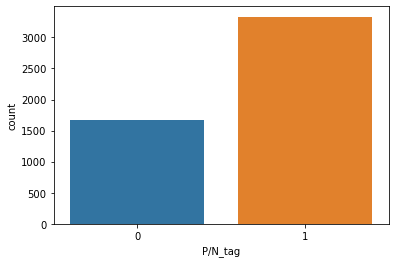

In [364]:
"""Here is a quick Visualisation to displat the difference in unblanced labels"""

sns.countplot(review['P/N_tag'])

# TF-IDF
### this will give more weight to words that are unique to a document than to words that are frequent

In [365]:
from sklearn.feature_extraction.text import TfidfVectorizer

def dummy_fun(doc):
    return doc

tfidf = TfidfVectorizer(
    analyzer='word',
    ngram_range= (1,1), 
    tokenizer= dummy_fun,
    preprocessor=dummy_fun,
    token_pattern=None
)


In [366]:
dependant = tfidf.fit_transform(review['CleanText'])
dependant = dependant.toarray()

In [280]:
from sklearn.model_selection import train_test_split

In [368]:
"""
we split the dependant variable with a 75%/25% split, the default split.
"""
x_train, x_test,y_train, y_test = train_test_split(dependant, review['P/N_tag'], random_state=50)

In [369]:
print(x_train)

[[0.4943821  0.         0.         ... 0.         0.         0.        ]
 [0.57809505 0.00706507 0.02118712 ... 0.         0.         0.        ]
 [0.57822481 0.         0.01834906 ... 0.         0.         0.        ]
 ...
 [0.6039948  0.         0.         ... 0.         0.         0.        ]
 [0.59334953 0.         0.         ... 0.         0.         0.        ]
 [0.47346729 0.         0.         ... 0.         0.         0.        ]]


In [370]:
print(y_train)

3512    1
115     1
1866    1
636     1
477     1
       ..
3330    0
70      0
132     1
2014    0
1931    1
Name: P/N_tag, Length: 3750, dtype: int32


In [289]:
"""in future iterations I will have to filter out non english reviews to increase the accuracy of the model"""
x_train.head()

3512    très beau lieu dans le quartier nous étions hu...
115     cant believe im saying think ate highest quali...
1866    boyfriend absolutely love place location right...
636     outstanding place eat ate several times servic...
477     bang buck deal found groupon pricey worth town...
Name: CleanText, dtype: object

In [367]:
print(dependant.shape)

(5000, 73)


In [371]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(3750, 73)
(1250, 73)
(3750,)
(1250,)


# Classification Algorithms


In [386]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn import svm
from sklearn import naive_bayes
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix

### 1. Naive Bayes

In [376]:
Naive = naive_bayes.MultinomialNB()
Naive.fit(x_train, y_train)

predictions_NB= Naive.predict(x_test)

print("Naive Bayes Accuracy Score -> ",accuracy_score(predictions_NB, y_test)*100)

Naive Bayes Accuracy Score ->  64.72


In [382]:
print(metrics.classification_report(y_test,predictions_NB))
print(confusion_matrix(y_test,predictions_NB))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       441
           1       0.65      1.00      0.79       809

    accuracy                           0.65      1250
   macro avg       0.32      0.50      0.39      1250
weighted avg       0.42      0.65      0.51      1250

[[  0 441]
 [  0 809]]


C:\Users\Marco\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Marco\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Marco\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [379]:
NBG = GaussianNB()
NBG.fit(x_train,y_train)

NB_pred=NBG.predict(x_test)
NB_accuracy=round(metrics.accuracy_score(y_test,NB_pred)*100,2)
NB_accuracy

35.6

In [389]:
print(metrics.classification_report(y_test,NB_pred))
print(confusion_matrix(y_test,NB_pred))

              precision    recall  f1-score   support

           0       0.35      1.00      0.52       441
           1       1.00      0.00      0.01       809

    accuracy                           0.36      1250
   macro avg       0.68      0.50      0.27      1250
weighted avg       0.77      0.36      0.19      1250

[[441   0]
 [805   4]]


### 2. Random Forest

In [383]:
text_classifier = RandomForestClassifier(n_estimators=200, random_state=0)
text_classifier.fit(x_train,y_train)


predictions_TC= text_classifier.predict(x_test)

print("Naive Bayes Accuracy Score -> ",accuracy_score(predictions_TC, y_test)*100)

Naive Bayes Accuracy Score ->  69.19999999999999


In [385]:
print(metrics.classification_report(y_test,predictions_TC))
print(confusion_matrix(y_test,predictions_TC))

              precision    recall  f1-score   support

           0       0.66      0.26      0.37       441
           1       0.70      0.93      0.80       809

    accuracy                           0.69      1250
   macro avg       0.68      0.59      0.58      1250
weighted avg       0.69      0.69      0.65      1250

[[113 328]
 [ 57 752]]


### 3. Support Vector Machine

In [387]:
clf=svm.SVC(decision_function_shape='ovo')
clf.fit(x_train, y_train)

predictions_CLF= clf.predict(x_test)

print("Naive Bayes Accuracy Score -> ",accuracy_score(predictions_CLF, y_test)*100)

Naive Bayes Accuracy Score ->  65.12


In [388]:
print(metrics.classification_report(y_test,predictions_CLF))
print(confusion_matrix(y_test,predictions_CLF))

              precision    recall  f1-score   support

           0       0.73      0.02      0.04       441
           1       0.65      1.00      0.79       809

    accuracy                           0.65      1250
   macro avg       0.69      0.51      0.41      1250
weighted avg       0.68      0.65      0.52      1250

[[  8 433]
 [  3 806]]
